<a href="https://colab.research.google.com/github/usnhee/TIL-/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
### 강의 시작전 미리 실행해 둘 명령어
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

sns.get_dataset_names()
data = sns.load_dataset(name="iris")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


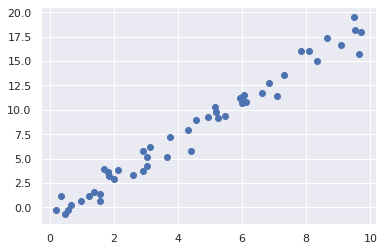

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
sns.set()
rng = np.random.RandomState(42)
x=10*rng.rand(50)
y = 2*x -1 + rng.randn(50)
plt.scatter(x,y)

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
LinearRegression(copy_X=True, fit_intercept = True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [3]:
X = x[:,np.newaxis]
x.shape

(50,)

[0,0,0,0,....0,0] 50개 항목 가진 리스트

In [4]:
X.shape

(50, 1)

[[0],[0],[0],  .... [0],[0]] 50개 항목 1개 씩 2차원배열. 

In [5]:
model.fit(X,y)

LinearRegression()

In [6]:
model.coef_

array([1.9776566])

In [7]:
model.intercept_

-0.9033107255311146

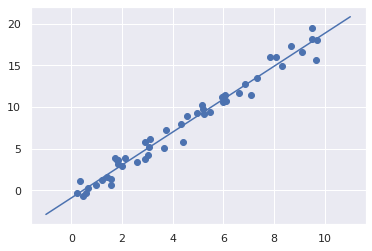

In [8]:
xfit = np.linspace(-1,11)

Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x,y)
plt.plot(xfit, yfit)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


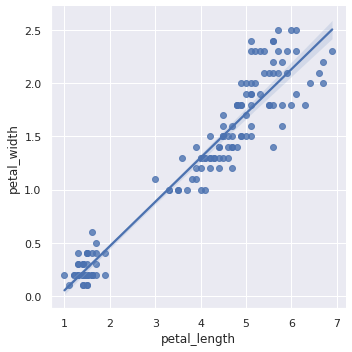

In [11]:
sns.lmplot('petal_length', 'petal_width', data)

In [12]:
iris_x=data['petal_length']
iris_x.shape

(150,)

In [13]:
iris_X=iris_x[:,np.newaxis]
iris_X.shape

##FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


(150, 1)

In [14]:
iris_y = data['petal_width']

In [16]:
model.fit(iris_X, iris_y)

LinearRegression()

In [17]:
model.coef_

array([0.41575542])

In [18]:
model.intercept_

-0.3630755213190291

In [21]:
from sklearn.datasets import load_iris
sns.set()
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [22]:
df['species'] = pd.Series(iris.target)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
sl_df = pd.DataFrame()
sl_df['sepal_length'] = df['sepal length (cm)']
sl_df['species'] = df['species']
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   species       150 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


In [24]:
sl_df = sl_df[:100]
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   species       100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [25]:
sl_df.describe()

,sepal_length,species
count,100.000000,100.000000
mean,5.471000,0.500000
std,0.641698,0.502519
min,4.300000,0.000000
25%,5.000000,0.000000
50%,5.400000,0.500000
75%,5.900000,1.000000
max,7.000000,1.000000


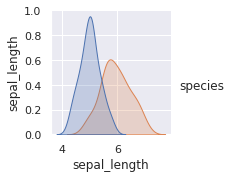

In [26]:
sns.pairplot(sl_df, hue = 'species')

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(sl_df.iloc[:,:1], sl_df.iloc[:,1:], test_size=0.33)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [33]:
X= x[:,np.newaxis]
x.shape

(50,)

In [34]:
X.shape

(50, 1)

In [35]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


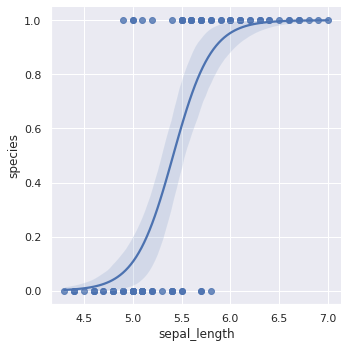

In [36]:
sns.lmplot(x='sepal_length', y = 'species', data = sl_df, logistic=True)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, lr.predict(X_train)))

[[30  4]
 [ 4 29]]


In [38]:
print(classification_report(y_train, lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        34
           1       0.88      0.88      0.88        33

    accuracy                           0.88        67
   macro avg       0.88      0.88      0.88        67
weighted avg       0.88      0.88      0.88        67



In [39]:
print(confusion_matrix(y_test, lr.predict(X_test)))

[[15  1]
 [ 2 15]]


In [40]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.94      0.88      0.91        17

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = pd.Series(iris.target)

%matplotlib inline

In [6]:
def setcolor(value):
  color = []
  colors = ['r', 'g', 'b']
  for i in value.values:
    color.append(colors[i])
  return color

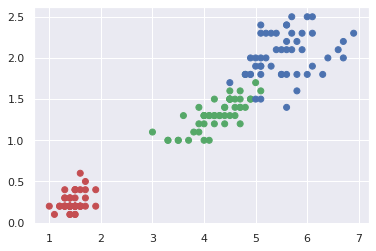

In [7]:
plt.scatter(x=df['petal length (cm)'], y = df['petal width (cm)'], color = setcolor(df['species']))

In [8]:
column_train = ['petal length (cm)', 'petal width (cm)']
neigh_3 = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

neigh_3_train = neigh_3.fit(df[column_train], df['species'])

In [9]:
new_data = np.array([2.5,0.8]).reshape(1,-1)

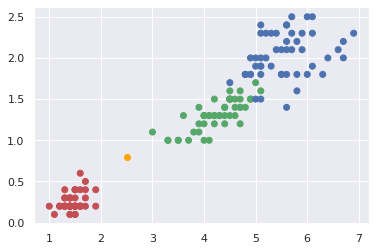

In [11]:
plt.scatter(x=df['petal length (cm)'], y = df['petal width (cm)'], color = setcolor(df['species']))

plt.scatter(x=new_data[0,0], y =new_data[0,1], color = 'orange')

In [12]:
neigh_3_class = neigh_3_train.predict(new_data)
print(neigh_3_class)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


TypeError: ignored

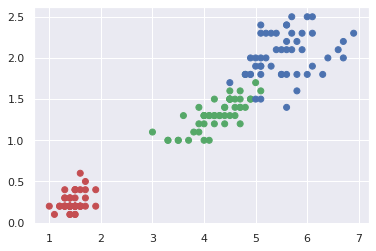

In [18]:
plt.scatter(x=df['petal length (cm)'], y = df['petal width (cm)'], color = setcolor(df['species']))
c3 = pd.DataFrame(np.array(neigh_3_class), columns=['c'])
col3= c3['c']
c3 = pd.DataFrame(np.array(neigh_3_class), columns=[0,1], color= setcolor(col3))

In [14]:
column_train = ['petal length (cm)', 'petal width (cm)']
neigh_7 = KNeighborsClassifier(n_neighbors=7, weights='distance')

neigh_7_train = neigh_7.fit(df[column_train], df['species'])

In [15]:
neigh_7_class = neigh_7_train.predict(new_data)
print(neigh_7_class)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


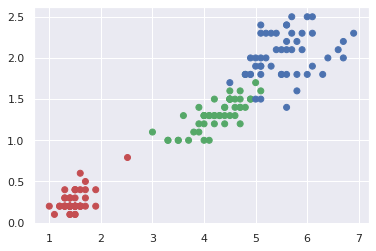

In [17]:
plt.scatter(x=df['petal length (cm)'], y =df['petal width (cm)'], color=setcolor(df['species']))

c7 = pd.DataFrame(np.array(neigh_7_class), columns=['c'])
col7= c7['c']
plt.scatter(x=new_data[0,0], y=new_data[0,1], color = setcolor(col7))


In [20]:
import numpy as np 
from sklearn import svm

X =np.array([ [0,0], [1,1] ])
y = [0,1]

In [21]:
LinearSVM = svm.LinearSVC()
LinearSVM.fit(X,y)

LinearSVC()

In [22]:
LinearSVM.predict([[2,2]])

print(LinearSVM.coef_[0])
print(LinearSVM.intercept_[0])

[0.58823254 0.58823254]
-0.47058135542107304


In [23]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

[0.58823254 0.58823254]


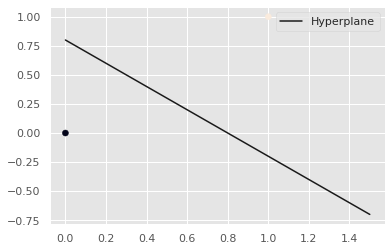

In [28]:
w = LinearSVM.coef_[0]
print(w)
b= LinearSVM.intercept_[0]
slope = -w[0] / w[1]
xx= np.linspace(0, 1.5)
yy=slope * xx - b/w[1]
h0 = plt.plot(xx,yy, 'k-', label='Hyperplane')
plt.scatter(X[:,0], X[:,1], c=y)
plt.legend()
plt.show()

In [32]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y=[0,1,1,0]

In [33]:
SVM_XOR = svm.SVC()
SVM_XOR.fit(X, y)

SVC()

In [34]:
test_data = np.array([[0.8,0.8], [0.2,0.9]])
SVM_XOR.predict(test_data)

array([0, 1])